In [ ]:
R.version.string
#https://github.com/katewall/medium_tutorials/blob/main/210630_Medium_ColabwithR.ipynb

[1] "R version 4.1.2 (2021-11-01)"

In [ ]:
#https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497 method 2, runtime is R
#This should work, but it did not for me. More info at the link below. Did not work in full but got close. 
#https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497
#install.packages("googledrive")
#library("googledrive")
#drive_auth(
#  email = gargle::gargle_oauth_email(),
#  path = NULL,
#  scopes = "https://www.googleapis.com/auth/drive",
#  cache = gargle::gargle_oauth_cache(),
#  use_oob = gargle::gargle_oob_default(),
#  token = NULL
#)

In [ ]:
install.packages("googledrive") #only need to install occasionally

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("httpuv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘promises’, ‘later’




In [ ]:
library("googledrive")
library("httpuv")

In [ ]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) { #may need to update python version occasionally
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.11.0 (2021-09-26 08:30:02 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




In [ ]:
 drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AX4XfWhlWDmjYmGfkqNs8VKql7IX-2MSziQnUaKp2twGlPw_n593ieuV9zM


In [ ]:
library(readr)

In [ ]:
getwd()

[1] "/content"

In [ ]:
x <- drive_get("~/CCFD project/fraudTrain.csv")
y <- drive_get("~/CCFD project/creditcard.csv")
drive_download(x,overwrite = TRUE)
drive_download(y,overwrite = TRUE)







→ Files retrieved so far: 100

→ Files retrieved so far: 200

→ Files retrieved so far: 300

→ Files retrieved so far: 400

→ Files retrieved so far: 500

→ Files retrieved so far: 600

→ Files retrieved so far: 700

→ Files retrieved so far: 800

→ Files retrieved so far: 900

→ Files retrieved so far: 1000

→ Files retrieved so far: 1100

→ Files retrieved so far: 1200

→ Files retrieved so far: 1300

→ Files retrieved so far: 1400

→ Files retrieved so far: 1500

→ Files retrieved so far: 1600

→ Files retrieved so far: 1700

→ Files retrieved so far: 1800

→ Files retrieved so far: 1900

→ Files retrieved so far: 2000

→ Files retrieved so far: 2100

✔ The input `path` resolved to exactly 1 file.





→ Files retrieved so far: 100

→ Files retrieved so far: 200

→ Files retrieved so far: 300

→ Files retrieved so far: 400

→ Files retrieved so far: 500

→ Files retrieved so far: 600

→ Files retrieved so far: 700

→ Files retrieved so far: 800

→ Files retrieved so far: 900

→ 

In [ ]:
Data <- read.csv("/content/fraudTrain.csv", stringsAsFactors = F)
ModelData <- read.csv("/content/creditcard.csv", stringsAsFactors = F)
head(Data,3)
head(ModelData,3)

,X,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,⋯,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
1,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,⋯,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01129,-82.04832,0
2,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,⋯,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.15905,-118.18646,0
3,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,⋯,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15070,-112.15448,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.359807,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.01830678,0.2778376,-0.1104739,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
2,0,1.191857,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.22577525,-0.6386720,0.1012880,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
3,1,-1.358354,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.24799815,0.7716794,0.9094123,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0


# New Section

In [ ]:
path <- drive_get("~/CCFD project/DMwR_0.4.1.tar.gz")
drive_download(path,overwrite = TRUE)

In [ ]:
install.packages('abind')
install.packages('zoo')
install.packages('xts')
install.packages('quantmod')
install.packages('ROCR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’




In [ ]:
library(caTools)
library(rpart)
#library(rpart.plot)
library(dplyr)
library(forcats)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
#install.packages("car")

In [ ]:
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ROSE")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(bitops)
library(abind)
library(zoo)
library(xts)
library(quantmod)
library(ROCR)
library(ROSE)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loaded ROSE 0.0-4




In [ ]:
install.packages("lattice")
install.packages("grid")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘grid’ is a base package, and should not be updated”


In [ ]:
install.packages( "/content/DMwR_0.4.1.tar.gz", repos=NULL, type="source" )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("DMwR")

In [ ]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("PRROC")       

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(PRROC)
library(pROC)


In [ ]:
View(Data)

X,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,⋯,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,⋯,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01129,-82.04832,0
1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,⋯,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.15905,-118.18646,0
2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,⋯,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15070,-112.15448,0
3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,⋯,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03433,-112.56107,0
4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,⋯,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67500,-78.63246,0
5,2019-01-01 00:04:08,4.767265e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,⋯,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.65338,-76.15267,0
6,2019-01-01 00:04:42,3.007469e+13,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,⋯,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.16270,-100.15337,0
7,2019-01-01 00:05:08,6.011361e+15,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,⋯,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.94809,-78.54030,0
8,2019-01-01 00:05:18,4.922711e+15,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,⋯,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.35181,-79.95815,0


In [ ]:
Data=Data[-1]

In [ ]:
str(Data)
summary(Data)
View(Data)
nrow(Data)
ncol(Data)

'data.frame':	1296675 obs. of  22 variables:
 $ trans_date_trans_time: chr  "2019-01-01 00:00:18" "2019-01-01 00:00:44" "2019-01-01 00:00:51" "2019-01-01 00:01:16" ...
 $ cc_num               : num  2.70e+15 6.30e+11 3.89e+13 3.53e+15 3.76e+14 ...
 $ merchant             : chr  "fraud_Rippin, Kub and Mann" "fraud_Heller, Gutmann and Zieme" "fraud_Lind-Buckridge" "fraud_Kutch, Hermiston and Farrell" ...
 $ category             : chr  "misc_net" "grocery_pos" "entertainment" "gas_transport" ...
 $ amt                  : num  4.97 107.23 220.11 45 41.96 ...
 $ first                : chr  "Jennifer" "Stephanie" "Edward" "Jeremy" ...
 $ last                 : chr  "Banks" "Gill" "Sanchez" "White" ...
 $ gender               : chr  "F" "F" "M" "M" ...
 $ street               : chr  "561 Perry Cove" "43039 Riley Greens Suite 393" "594 White Dale Suite 530" "9443 Cynthia Court Apt. 038" ...
 $ city                 : chr  "Moravian Falls" "Orient" "Malad City" "Boulder" ...
 $ state            

 trans_date_trans_time     cc_num            merchant        
 Length:1296675        Min.   :6.042e+10   Length:1296675    
 Class :character      1st Qu.:1.800e+14   Class :character  
 Mode  :character      Median :3.521e+15   Mode  :character  
                       Mean   :4.172e+17                     
                       3rd Qu.:4.642e+15                     
                       Max.   :4.992e+18                     
   category              amt              first               last          
 Length:1296675     Min.   :    1.00   Length:1296675     Length:1296675    
 Class :character   1st Qu.:    9.65   Class :character   Class :character  
 Mode  :character   Median :   47.52   Mode  :character   Mode  :character  
                    Mean   :   70.35                                        
                    3rd Qu.:   83.14                                        
                    Max.   :28948.90                                        
    gender             stre

trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,⋯,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,⋯,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01129,-82.04832,0
2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,⋯,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.15905,-118.18646,0
2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,⋯,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15070,-112.15448,0
2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,⋯,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03433,-112.56107,0
2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,⋯,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67500,-78.63246,0
2019-01-01 00:04:08,4.767265e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,⋯,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.65338,-76.15267,0
2019-01-01 00:04:42,3.007469e+13,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,⋯,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.16270,-100.15337,0
2019-01-01 00:05:08,6.011361e+15,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,⋯,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.94809,-78.54030,0
2019-01-01 00:05:18,4.922711e+15,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,⋯,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.35181,-79.95815,0


[1] 1296675

[1] 22

In [ ]:
# Let's check for any missing values in the data
colSums(is.na(Data))#Checking for na 
apply(is.na(Data),2,sum) # removes na to add sum

trans_date_trans_time                cc_num              merchant 
                    0                     0                     0 
             category                   amt                 first 
                    0                     0                     0 
                 last                gender                street 
                    0                     0                     0 
                 city                 state                   zip 
                    0                     0                     0 
                  lat                  long              city_pop 
                    0                     0                     0 
                  job                   dob             trans_num 
                    0                     0                     0 
            unix_time             merch_lat            merch_long 
                    0                     0                     0 
             is_fraud 
                    0

trans_date_trans_time                cc_num              merchant 
                    0                     0                     0 
             category                   amt                 first 
                    0                     0                     0 
                 last                gender                street 
                    0                     0                     0 
                 city                 state                   zip 
                    0                     0                     0 
                  lat                  long              city_pop 
                    0                     0                     0 
                  job                   dob             trans_num 
                    0                     0                     0 
            unix_time             merch_lat            merch_long 
                    0                     0                     0 
             is_fraud 
                    0

In [ ]:
summary(Data) # Check summary of dataset with replaced NA values

 trans_date_trans_time     cc_num            merchant        
 Length:1296675        Min.   :6.042e+10   Length:1296675    
 Class :character      1st Qu.:1.800e+14   Class :character  
 Mode  :character      Median :3.521e+15   Mode  :character  
                       Mean   :4.172e+17                     
                       3rd Qu.:4.642e+15                     
                       Max.   :4.992e+18                     
   category              amt              first               last          
 Length:1296675     Min.   :    1.00   Length:1296675     Length:1296675    
 Class :character   1st Qu.:    9.65   Class :character   Class :character  
 Mode  :character   Median :   47.52   Mode  :character   Mode  :character  
                    Mean   :   70.35                                        
                    3rd Qu.:   83.14                                        
                    Max.   :28948.90                                        
    gender             stre

In [ ]:
#################################################################################################################################################
###EDA### 

# check how many entries for fraud and non fraud

In [ ]:
data_fraud = Data[which(Data$is_fraud == 1),]
print (nrow(data_fraud))

[1] 7506


In [ ]:
data_notfraud = Data[which(Data$is_fraud == 0),]
print (nrow(data_notfraud))

[1] 1289169


In [ ]:
print (nrow(Data))

[1] 1296675


In [ ]:
# % split of fraud/non fraud records
prop.table(table(Data$is_fraud))


          0           1 
0.994211348 0.005788652 

In [ ]:
prop.table(table(ModelData$class))

numeric(0)

In [ ]:
View(modelData)

In [ ]:
#The above shows that data is highly imbalanced

In [ ]:
#check fraud and non fraud cases groupby gender

In [ ]:
men_notfraud = nrow(Data[which(Data$is_fraud == 0 & Data$gender == "M"),]) # 583041
men_notfraud

[1] 583041

In [ ]:
women_notfraud = nrow(Data[which(Data$is_fraud == 0 & Data$gender == "F"),]) #706128
women_notfraud 


[1] 706128

In [ ]:
men_fraud = nrow(Data[which(Data$is_fraud == 1 & Data$gender == "M"),]) # 3771
men_fraud

[1] 3771

In [ ]:
women_fraud = nrow(Data[which(Data$is_fraud == 1 & Data$gender == "F"),]) # 3735
women_fraud

[1] 3735

In [ ]:
# % of men who frauded
men_fraud_percent = (men_fraud/(men_notfraud + men_fraud))*100
print (men_fraud_percent) #0.64%

[1] 0.6426249


In [ ]:
# % of women who frauded
women_fraud_percent = 100 * women_fraud/(women_notfraud + women_fraud)
print (women_fraud_percent) #0.52%


[1] 0.5261579


In [ ]:
#Find the max and top ten fraud cases transaction amount
(top_n(data_fraud, 10, data_fraud$amt))$amt   
max(data_fraud$amt)#1376.04

[1] 1334.07 1292.21 1371.81 1289.89 1313.18 1294.83 1289.07 1324.80 1312.98
[10] 1376.04

[1] 1376.04

In [ ]:
#Find the average fraud amount per category. 
table(data_fraud$category)


 entertainment    food_dining  gas_transport    grocery_net    grocery_pos 
           233            151            618            134           1743 
health_fitness           home      kids_pets       misc_net       misc_pos 
           133            198            239            915            250 
 personal_care   shopping_net   shopping_pos         travel 
           220           1713            843            116 

In [ ]:
aggregate(data_fraud$amt, list(data_fraud$category), mean)

Group.1,x
<chr>,<dbl>
entertainment,503.535579
food_dining,120.076954
gas_transport,12.288204
grocery_net,12.162836
grocery_pos,311.989616
health_fitness,20.248421
home,257.432626
kids_pets,18.121674
misc_net,797.012852


In [ ]:
aggregate(data_fraud$amt, list(data_fraud$category), median) # It is mostly same for mean and median

Group.1,x
<chr>,<dbl>
entertainment,498.860
food_dining,119.420
gas_transport,10.645
grocery_net,12.365
grocery_pos,309.980
health_fitness,19.800
home,252.160
kids_pets,19.520
misc_net,792.330


In [ ]:
#Average fraud amount for shopping net is $797.55 /  $1000

In [ ]:
#check why av fraud is high for shopping net is high
df = data_fraud[which(data_fraud$category == 'shopping_net'),]
head(df, 1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,⋯,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
2938,2019-01-02 13:38:08,4.613315e+12,fraud_Medhurst PLC,shopping_net,844.8,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,⋯,35.9946,-81.7266,885,Soil scientist,1988-09-15,248c2746e78f2ec713df51254ff1b302,1325511488,35.9878,-81.25433,1


In [ ]:
nrow(df) # 1713 transactions done in shopping_net category

[1] 1713

In [ ]:
#Find the top 10 cities with max frauds
top_n(count(data_fraud, data_fraud$city), 10)

Selecting by n



data_fraud$city,n
<chr>,<int>
Dallas,27
Detroit,26
Houston,39
Huntsville,29
Naples,29
Randolph,25
San Antonio,25
Topeka,27
Tulsa,27


In [ ]:
df1 = aggregate(data_fraud$amt, list(data_fraud$city), median)

In [ ]:
head(df1, 1)

,Group.1,x
,<chr>,<dbl>
1,Achille,235.94


In [ ]:
top_n(df1, 10)

Selecting by x



Group.1,x
<chr>,<dbl>
Angwin,998.255
Belle Fourche,1000.080
De Lancey,1067.280
Irvington,953.590
Karns City,949.440
Laguna Hills,1009.650
Newark Valley,966.410
North East,1031.240
Thida,1019.155


In [ ]:
# Group.1        x
# 1         Angwin  998.255
# 2  Belle Fourche 1000.080
# 3      De Lancey 1067.280
# 4      Irvington  953.590
# 5     Karns City  949.440
# 6   Laguna Hills 1009.650
# 7  Newark Valley  966.410
# 8     North East 1031.240
# 9          Thida 1019.155
# 10    Vero Beach  977.010



In [ ]:
#Find the top 10 states with max frauds
top_n(count(data_fraud, data_fraud$state), 10) #max frauds in Texas state

Selecting by n



data_fraud$state,n
<chr>,<int>
AL,215
CA,326
FL,281
IL,248
MI,238
MN,207
NY,555
OH,321
PA,458


In [ ]:
top_n(count(data_notfraud, data_notfraud$state), 10)

Selecting by n



data_notfraud$state,n
<chr>,<int>
AL,40774
CA,56034
FL,42390
IL,43004
MI,45916
MO,38212
NY,82946
OH,46159
PA,79389


In [ ]:
df2 = aggregate(data_fraud$amt, list(data_fraud$state), median)

In [ ]:
View(data_fraud)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,⋯,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>
2450,2019-01-02 01:06:37,4.613315e+12,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,⋯,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.43012,-81.17948,1
2473,2019-01-02 01:47:29,3.401870e+14,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,⋯,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.81936,-99.14279,1
2524,2019-01-02 03:05:23,3.401870e+14,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,⋯,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.27308,-98.83636,1
2547,2019-01-02 03:38:03,4.613315e+12,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,⋯,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.90929,-82.09101,1
2554,2019-01-02 03:55:47,3.401870e+14,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,⋯,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.78643,-98.68341,1
2938,2019-01-02 13:38:08,4.613315e+12,fraud_Medhurst PLC,shopping_net,844.80,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,⋯,35.9946,-81.7266,885,Soil scientist,1988-09-15,248c2746e78f2ec713df51254ff1b302,1325511488,35.98780,-81.25433,1
3528,2019-01-02 23:52:08,4.613315e+12,fraud_Ruecker Group,misc_net,843.91,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,⋯,35.9946,-81.7266,885,Soil scientist,1988-09-15,2f7d497f607396ab669c14c2abe3886f,1325548328,35.98561,-81.38331,1
3581,2019-01-03 01:05:27,3.401870e+14,fraud_Conroy-Cruickshank,gas_transport,10.76,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,⋯,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,0a2f8002e55a3565c5c88d8cf039fed8,1325552727,28.85671,-97.79421,1
3601,2019-01-03 01:35:52,3.401870e+14,fraud_Koepp-Parker,grocery_pos,332.35,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,⋯,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,97903213a2fd7e53bbaa60807144a505,1325554552,29.32066,-97.93722,1


In [ ]:
df3 = aggregate(data_fraud$amt, list(data_fraud$state), sum)

In [ ]:
head(df3, 1)


,Group.1,x
,<chr>,<dbl>
1,AK,18578.67


In [ ]:
top_n(df3, 10)

Selecting by x



Group.1,x
<chr>,<dbl>
AL,112597.0
CA,170943.9
FL,150913.0
IL,128442.0
MI,121012.1
MN,112454.4
NY,295548.6
OH,168920.0
PA,244624.7


In [ ]:
# Selecting by x
# Group.1        x
# 1       AL 112597.0
# 2       CA 170943.9
# 3       FL 150913.0
# 4       IL 128442.0
# 5       MI 121012.1
# 6       MN 112454.4
# 7       NY 295548.6
# 8       OH 168920.0
# 9       PA 244624.7
# 10      TX 265806.4


In [ ]:
## Univariate & Bivariate Analysis
#Find skewness and kurtosis of fraud amount

In [ ]:
install.packages("moments")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(moments)

In [ ]:
library(dplyr)

In [ ]:
data_fraud %>% 
  summarise(Skew = skewness(data_fraud$amt), Kurtosis = kurtosis(data_fraud$amt))

Skew,Kurtosis
<dbl>,<dbl>
0.02584092,1.500328


In [ ]:
#skewness =0.02 and Kurtosis = 1.5

#The Skewness for the amount variable is 0.02 as the distribution is moderately skewed.
#Kurtosis can reach values from 1 to positive infinite.
#Normal distribution kurtosis = 3
#A distribution that is more peaked and has fatter tails than normal distribution has kurtosis value greater than 3 (the higher kurtosis, the more peaked and fatter tails). Such distribution is called leptokurtic or leptokurtotic.
#A distribution that is less peaked and has thinner tails than normal distribution has kurtosis value between 1 and 3. Such distribution is called platykurtic or platykurtotic.
#The kurtosis for the crew variable is 3.72 as the distribution is more peaked and has fatter tails than normal distribution skewed.


In [ ]:
#create time bins of data

In [ ]:
Data$hour = format(as.POSIXct(Data$trans_date_trans_time), format = "%H")

In [ ]:
Data$year = format(as.POSIXct(Data$trans_date_trans_time), format = "%Y")

In [ ]:
Data$month = format(as.POSIXct(Data$trans_date_trans_time), format = "%m")

In [ ]:
Data$year = as.numeric(Data$year)

In [ ]:
Data$hour = as.numeric(Data$hour)

In [ ]:
Data$month = as.numeric(Data$month)

In [ ]:
Data$hour_bin = cut(Data$hour, 6, labels=c("midnight", "morning", "noon", "afternoon", "evening", "night"))

In [ ]:
head(Data, 10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,⋯,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,year,month,hour_bin
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
1,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,⋯,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01129,-82.04832,0,0,2019,1,midnight
2,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,⋯,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.15905,-118.18646,0,0,2019,1,midnight
3,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,⋯,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15070,-112.15448,0,0,2019,1,midnight
4,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,⋯,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03433,-112.56107,0,0,2019,1,midnight
5,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,⋯,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67500,-78.63246,0,0,2019,1,midnight
6,2019-01-01 00:04:08,4.767265e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,⋯,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.65338,-76.15267,0,0,2019,1,midnight
7,2019-01-01 00:04:42,3.007469e+13,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,⋯,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.16270,-100.15337,0,0,2019,1,midnight
8,2019-01-01 00:05:08,6.011361e+15,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,⋯,1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.94809,-78.54030,0,0,2019,1,midnight
9,2019-01-01 00:05:18,4.922711e+15,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,⋯,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.35181,-79.95815,0,0,2019,1,midnight


In [ ]:
View(Data)

trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,⋯,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,year,month,hour_bin
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,⋯,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01129,-82.04832,0,0,2019,1,midnight
2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,⋯,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.15905,-118.18646,0,0,2019,1,midnight
2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,⋯,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15070,-112.15448,0,0,2019,1,midnight
2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,⋯,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03433,-112.56107,0,0,2019,1,midnight
2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,⋯,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67500,-78.63246,0,0,2019,1,midnight
2019-01-01 00:04:08,4.767265e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,⋯,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.65338,-76.15267,0,0,2019,1,midnight
2019-01-01 00:04:42,3.007469e+13,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,⋯,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.16270,-100.15337,0,0,2019,1,midnight
2019-01-01 00:05:08,6.011361e+15,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,⋯,1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.94809,-78.54030,0,0,2019,1,midnight
2019-01-01 00:05:18,4.922711e+15,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,⋯,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.35181,-79.95815,0,0,2019,1,midnight


In [ ]:
data_fraud = Data[which(Data$is_fraud == 1),]

In [ ]:
#Cost Benefit Analysis
#Average number of transactions per month

In [ ]:
average_trans_pm = nrow(Data) / 12
average_trans_pm # 108056.2

[1] 108056.2

In [ ]:
average_trans_pm = nrow(Data) / 18
average_trans_pm # 108056.2 for 1.5 years

[1] 54028.12

In [ ]:
average_trans_pm_2019=nrow(Data$year ==2019)/12

In [ ]:
average_trans_pm_2019

numeric(0)

In [ ]:
#Average number of fraudulent transaction per month
data_fraud = Data[which(Data$is_fraud == 1),]

In [ ]:
data_year_2019 = Data[which(data_fraud$year == 2019),]

In [ ]:
data_year_2019_months = unique(data_year_2019$month)

In [ ]:
data_year_2019_months

[1] 1

In [ ]:
data_year_2020 = Data[which(data_fraud$year == 2020),]

In [ ]:
data_year_2020_months = unique(data_year_2020$month)

In [ ]:
data_year_2020_months

[1] 1

In [ ]:
nrow(data_year_2019)

[1] 5220

In [ ]:
average_trans_pm_2019 = nrow(data_year_2019) / 12

In [ ]:
average_trans_pm_2019 # 435

[1] 435

In [ ]:
data_year_2020 = Data[which(data_fraud$year == 2020),]

In [ ]:
average_trans_pm_2020 = nrow(data_year_2020) / 12

In [ ]:
average_trans_pm_2020 # 190.5

[1] 190.5

In [ ]:
#Average amount per fraud transaction
data_fraud = Data[which(Data$is_fraud == 1),]

In [ ]:
View(data_fraud)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,⋯,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,year,month,hour_bin
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>
2450,2019-01-02 01:06:37,4.613315e+12,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,⋯,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.43012,-81.17948,1,1,2019,1,midnight
2473,2019-01-02 01:47:29,3.401870e+14,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,⋯,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.81936,-99.14279,1,1,2019,1,midnight
2524,2019-01-02 03:05:23,3.401870e+14,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,⋯,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.27308,-98.83636,1,3,2019,1,midnight
2547,2019-01-02 03:38:03,4.613315e+12,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,⋯,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.90929,-82.09101,1,3,2019,1,midnight
2554,2019-01-02 03:55:47,3.401870e+14,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,⋯,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.78643,-98.68341,1,3,2019,1,midnight
2938,2019-01-02 13:38:08,4.613315e+12,fraud_Medhurst PLC,shopping_net,844.80,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,⋯,1988-09-15,248c2746e78f2ec713df51254ff1b302,1325511488,35.98780,-81.25433,1,13,2019,1,afternoon
3528,2019-01-02 23:52:08,4.613315e+12,fraud_Ruecker Group,misc_net,843.91,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,⋯,1988-09-15,2f7d497f607396ab669c14c2abe3886f,1325548328,35.98561,-81.38331,1,23,2019,1,night
3581,2019-01-03 01:05:27,3.401870e+14,fraud_Conroy-Cruickshank,gas_transport,10.76,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,⋯,1960-10-28,0a2f8002e55a3565c5c88d8cf039fed8,1325552727,28.85671,-97.79421,1,1,2019,1,midnight
3601,2019-01-03 01:35:52,3.401870e+14,fraud_Koepp-Parker,grocery_pos,332.35,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,⋯,1960-10-28,97903213a2fd7e53bbaa60807144a505,1325554552,29.32066,-97.93722,1,1,2019,1,midnight


In [ ]:
nrow(data_fraud) 

[1] 7506

In [ ]:
Average_fraud_amt_trans = sum(data_fraud$amt) / nrow(data_fraud) 
Average_fraud_amt_trans #531

[1] 531.3201

In [ ]:
#Histogram
library(ggplot2)

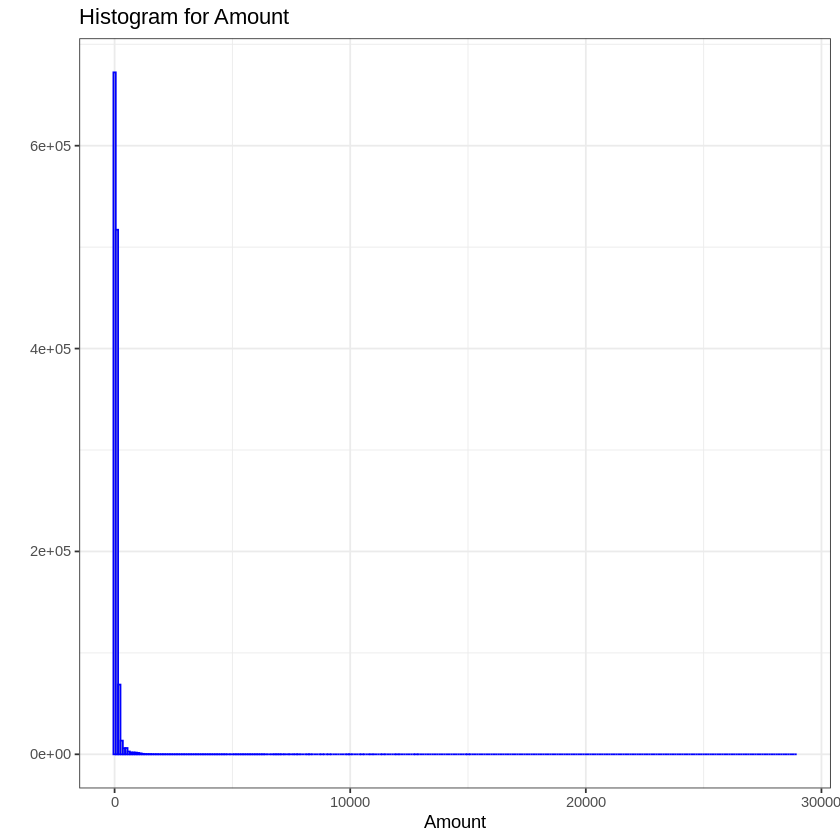

In [ ]:
qplot(Data$amt,
      geom="histogram",
      binwidth=100,  
      main="Histogram for Amount", 
      xlab="Amount", 
      fill=I("gray"), 
      col=I("blue"))+theme_bw()


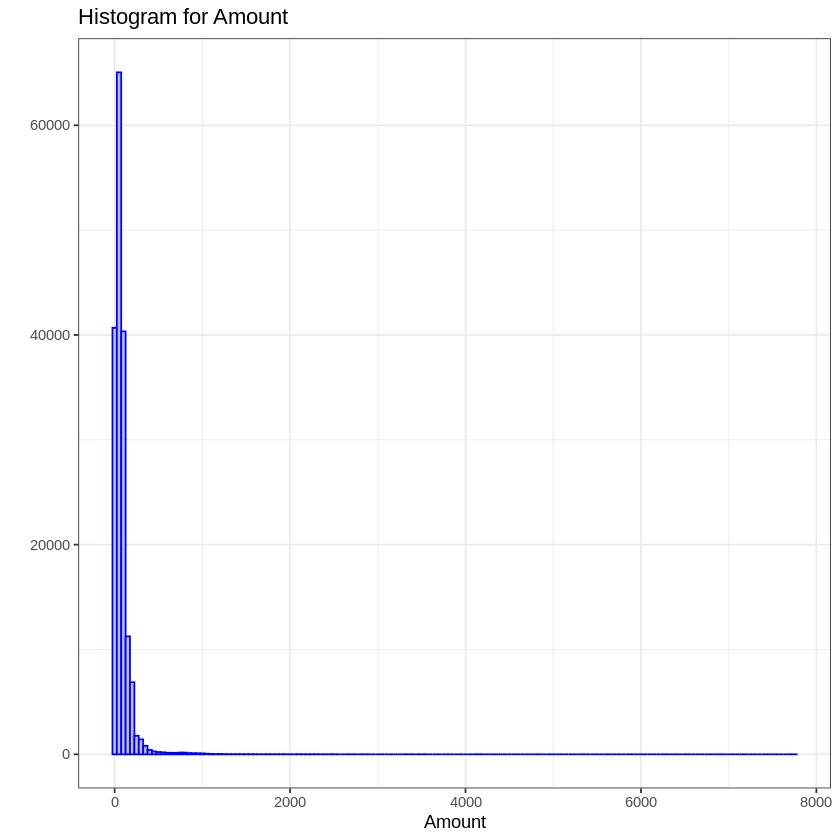

In [ ]:
Data_hour_bin_mignight = Data[which(Data$hour_bin == "midnight"),]
qplot(Data_hour_bin_mignight$amt,
      geom="histogram",
      binwidth=50,  
      main="Histogram for Amount", 
      xlab="Amount", 
      fill=I("gray"), 
      col=I("blue"))+theme_bw()

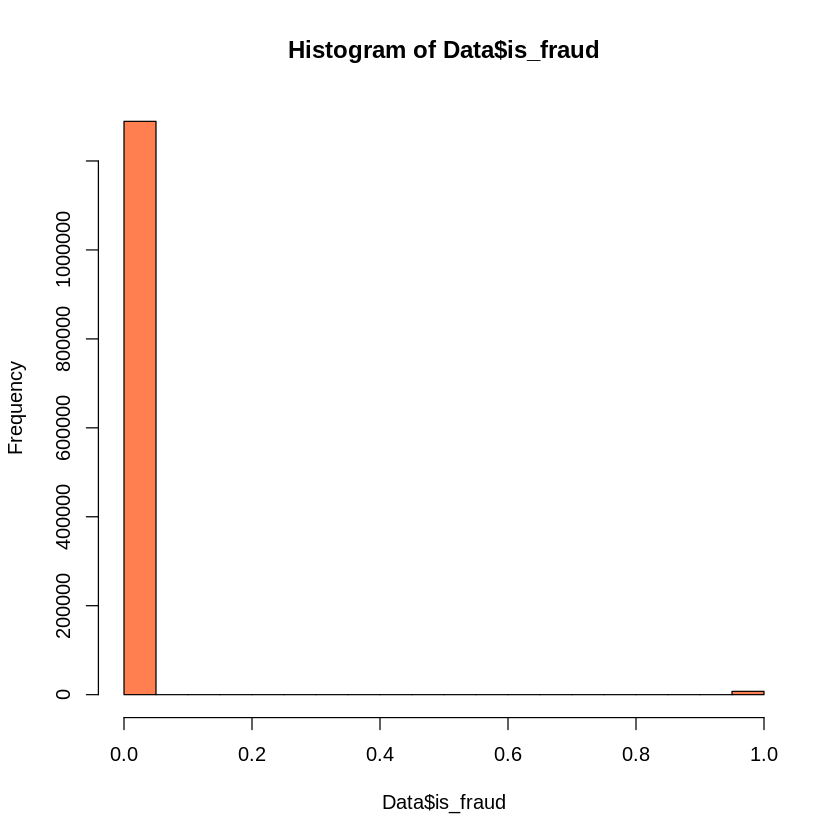

In [ ]:
hist(Data$is_fraud,col="coral")

In [ ]:
#Bivariate Analysis
#Dataset is highly imbalanced

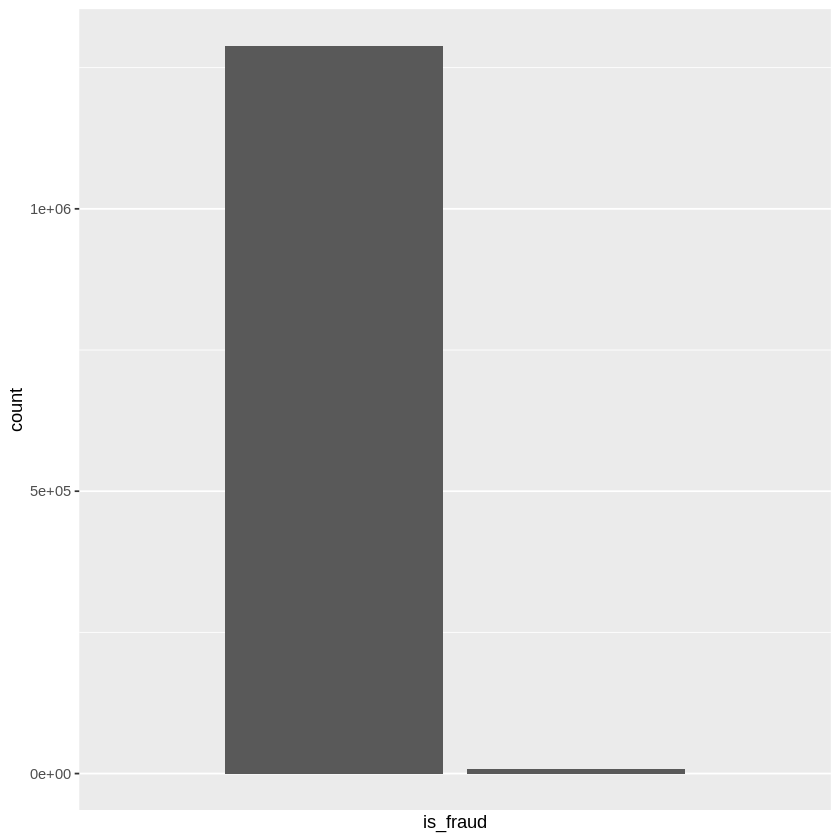

In [ ]:
ggplot(data = Data, aes(x = is_fraud), 
       y = prop.table(stat(count)), fill = is_fraud,
       label = scales::percent(prop.table(stat(count)))) + geom_bar(position = "dodge") + 
  scale_x_discrete(labels = c("no fraud", "fraud"))

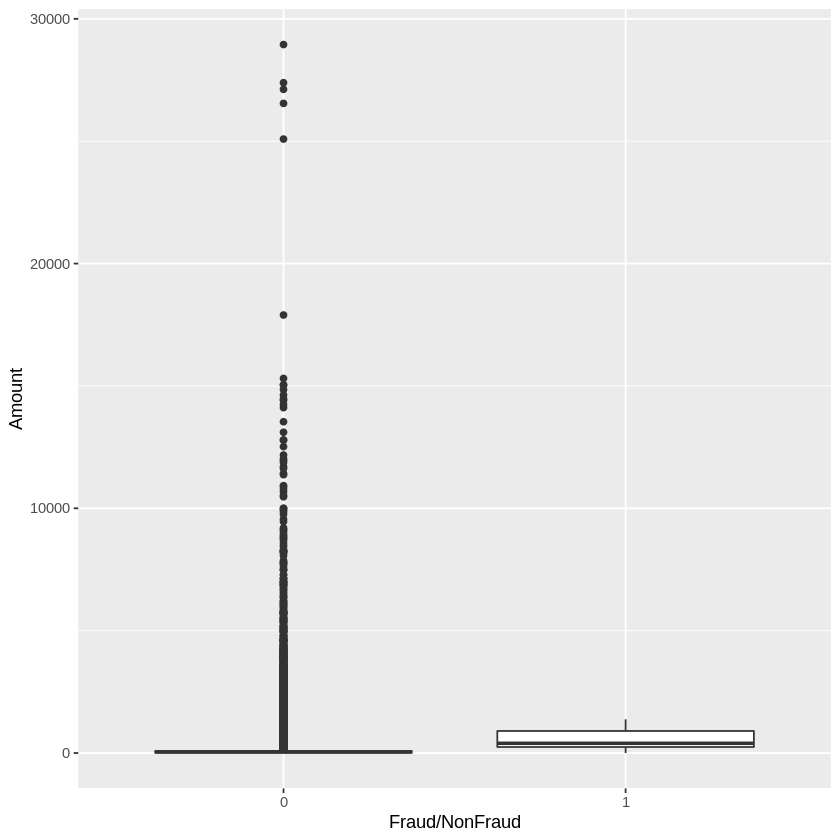

In [ ]:
#Data variability is high in non fraud transactions
ggplot(Data, aes(x = factor(is_fraud), y = amt)) + geom_boxplot() + labs(x = 'Fraud/NonFraud', y = 'Amount')

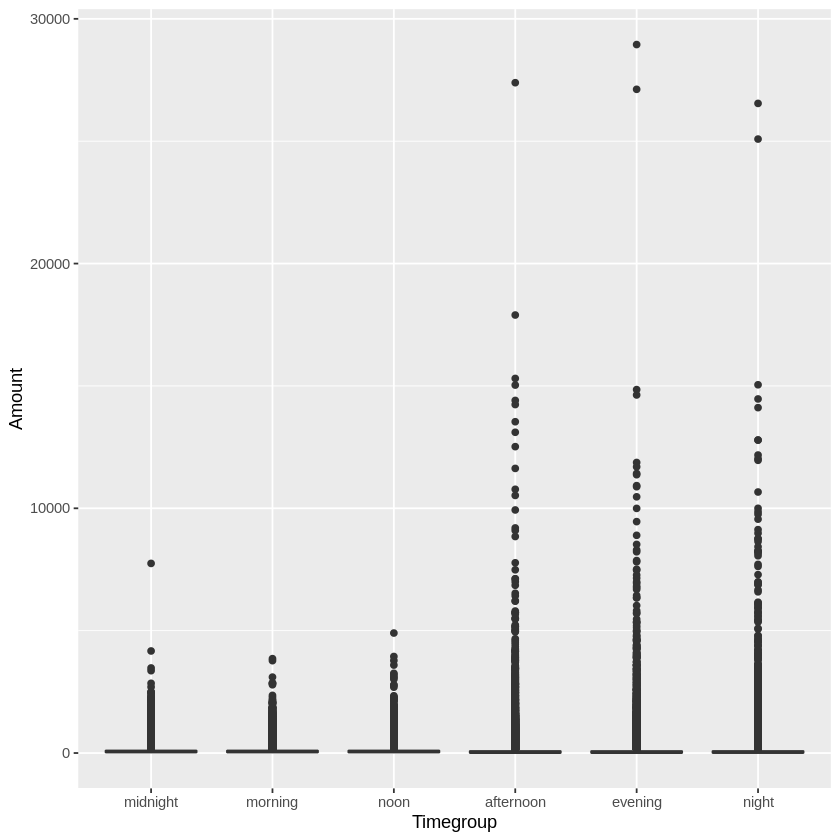

In [ ]:
ggplot(Data, aes(x = factor(hour_bin), y = amt)) + geom_boxplot() + labs(x = 'Timegroup', y = 'Amount')

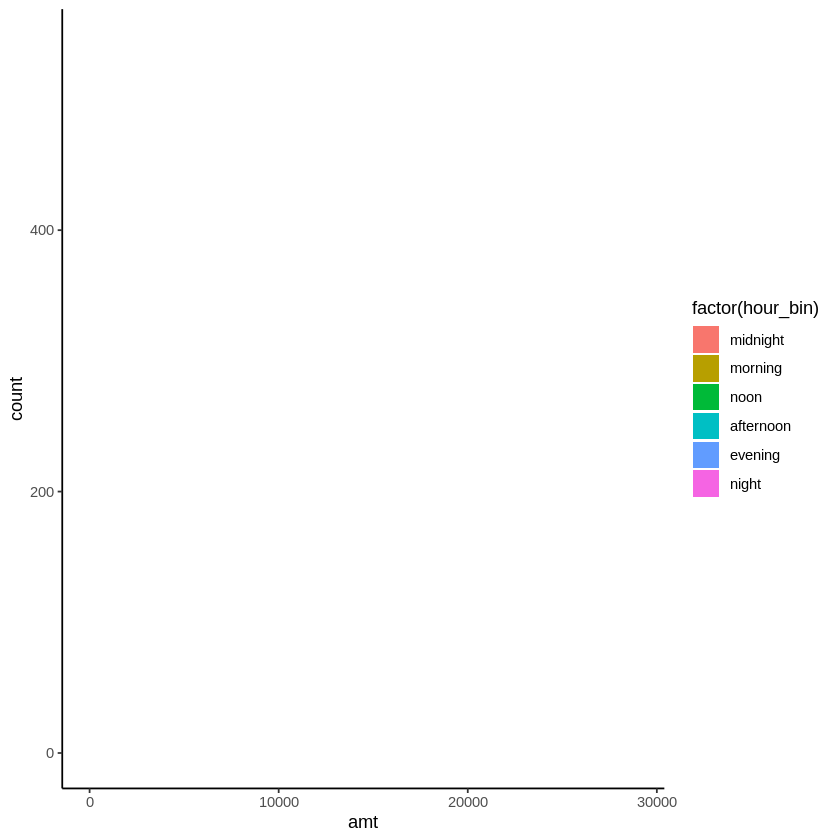

In [ ]:
ggplot(Data, aes(x = amt, fill = factor(hour_bin))) +
  geom_bar() +
  theme_classic()

In [ ]:
View(data_fraud)

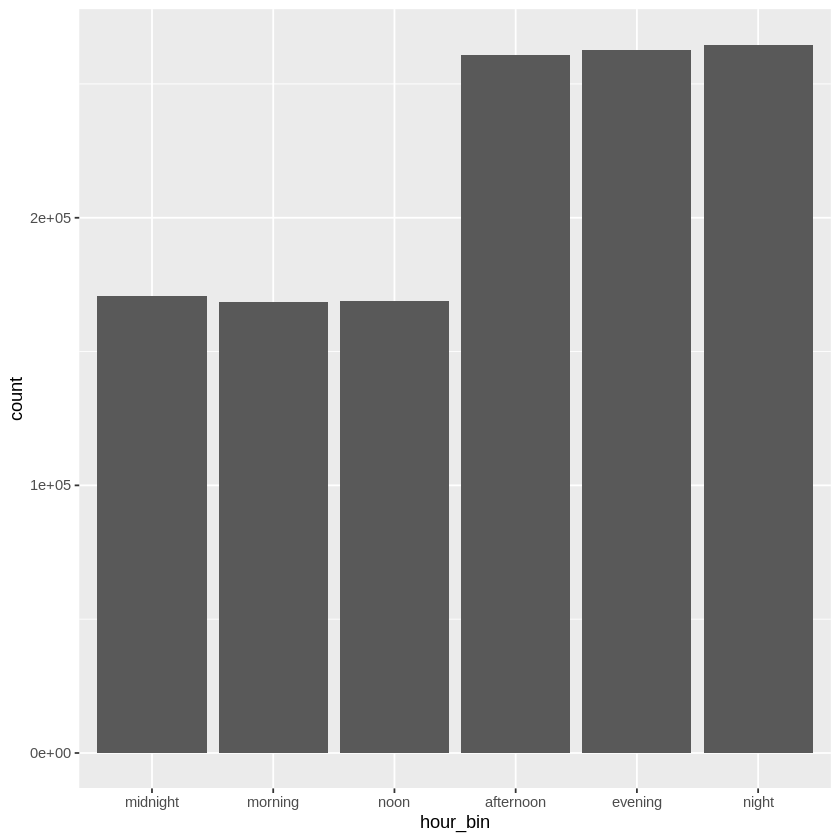

In [ ]:
ggplot(data = Data, aes(x = hour_bin), 
       y = prop.table(stat(count)),
       label = scales::percent(prop.table(stat(count)))) + geom_bar()

`geom_smooth()` using formula 'y ~ x'



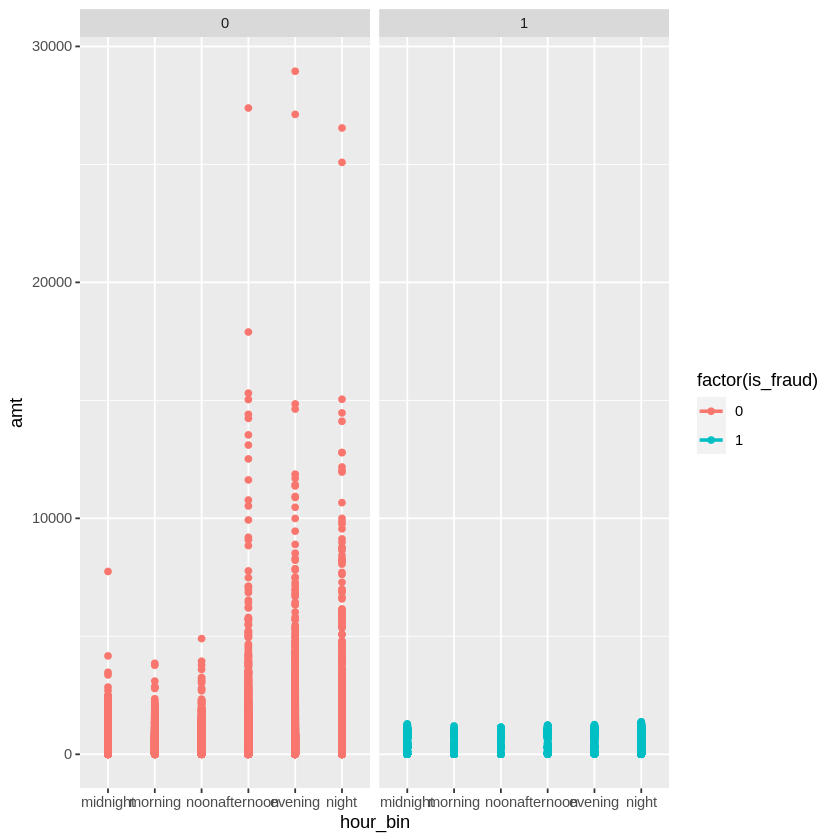

In [ ]:
# Faceting: The above plot is very dense and confusing. To reduce it, we Facet the data into groups.
ggplot(data = Data,
       aes(y = amt, x = hour_bin, col = factor(is_fraud))) + 
  geom_point() +
  geom_smooth(se = F, method = 'lm') +
  facet_grid(~(is_fraud))

In [ ]:
### 7. #Finding the Imbalance in Dependent variable

In [ ]:
#ModelData=read.csv("C:/Users/admin/Desktop/CCFD project/creditcard.csv", na.strings=c("","","NA"))

In [ ]:
View(ModelData)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,-1.3598071,-0.07278117,2.53634674,1.37815522,-0.338320770,0.46238778,0.239598554,0.098697901,0.3637870,⋯,-0.018306778,0.277837576,-0.110473910,0.06692807,0.12853936,-0.18911484,0.133558377,-0.021053053,149.62,0
0,1.1918571,0.26615071,0.16648011,0.44815408,0.060017649,-0.08236081,-0.078802983,0.085101655,-0.2554251,⋯,-0.225775248,-0.638671953,0.101288021,-0.33984648,0.16717040,0.12589453,-0.008983099,0.014724169,2.69,0
1,-1.3583541,-1.34016307,1.77320934,0.37977959,-0.503198133,1.80049938,0.791460956,0.247675787,-1.5146543,⋯,0.247998153,0.771679402,0.909412262,-0.68928096,-0.32764183,-0.13909657,-0.055352794,-0.059751841,378.66,0
1,-0.9662717,-0.18522601,1.79299334,-0.86329128,-0.010308880,1.24720317,0.237608940,0.377435875,-1.3870241,⋯,-0.108300452,0.005273597,-0.190320519,-1.17557533,0.64737603,-0.22192884,0.062722849,0.061457629,123.50,0
2,-1.1582331,0.87773675,1.54871785,0.40303393,-0.407193377,0.09592146,0.592940745,-0.270532677,0.8177393,⋯,-0.009430697,0.798278495,-0.137458080,0.14126698,-0.20600959,0.50229222,0.219422230,0.215153147,69.99,0
2,-0.4259659,0.96052304,1.14110934,-0.16825208,0.420986881,-0.02972755,0.476200949,0.260314333,-0.5686714,⋯,-0.208253515,-0.559824796,-0.026397668,-0.37142658,-0.23279382,0.10591478,0.253844225,0.081080257,3.67,0
4,1.2296576,0.14100351,0.04537077,1.20261274,0.191880989,0.27270812,-0.005159003,0.081212940,0.4649600,⋯,-0.167716266,-0.270709726,-0.154103787,-0.78005542,0.75013694,-0.25723685,0.034507430,0.005167769,4.99,0
7,-0.6442694,1.41796355,1.07438038,-0.49219902,0.948934095,0.42811846,1.120631358,-3.807864239,0.6153747,⋯,1.943465340,-1.015454710,0.057503530,-0.64970901,-0.41526657,-0.05163430,-1.206921081,-1.085339188,40.80,0
7,-0.8942861,0.28615720,-0.11319221,-0.27152613,2.669598660,3.72181806,0.370145128,0.851084443,-0.3920476,⋯,-0.073425100,-0.268091632,-0.204232670,1.01159180,0.37320468,-0.38415731,0.011747356,0.142404330,93.20,0


In [ ]:
str(ModelData)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [ ]:
set.seed(1234)

In [ ]:
#checking class imbalance
table(ModelData$Class)


     0      1 
284315    492 

In [ ]:
# class imbalance in percentage
prop.table(table(ModelData$Class)) #99.82% vs 0.17%


          0           1 
0.998272514 0.001727486 

In [ ]:
# Now we will group the datas based on the Class value and 
# For this we will use dplyr package which contans groupby function.
ModelData$Class <- as.factor(ModelData$Class)

In [ ]:
creditcardDF <- ModelData %>% group_by(Class) %>% summarize(Class_count = n())

In [ ]:
View(creditcardDF)

Class,Class_count
<fct>,<int>
0,284315
1,492


In [ ]:
### 8.#two t-sample test X & Y IV vs DV
#Ho- Reject null hypothesis that there is no differences between both the variables response variable based on the
#continuous predictors ie Applicant Income and Credit History

In [ ]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘quantreg’, ‘car’, ‘rstatix’




In [ ]:
library(ggpubr)

In [ ]:
View(Data)

In [ ]:
Ttestdata=Data[,c(12,6,23)] # Target Variables is is_fraud (25) with amt (8) and State (14) as continuous and categorical predictors respectively


In [ ]:
View(Ttestdata)

zip,first,hour
<int>,<chr>,<dbl>
28654,Jennifer,0
99160,Stephanie,0
83252,Edward,0
59632,Jeremy,0
24433,Tyler,0
18917,Jennifer,0
67851,Kelsey,0
22824,Steven,0
15665,Heather,0


In [ ]:
Y0=subset(Ttestdata,Ttestdata$amt < 500)$is_fraud

In [ ]:
Y1=subset(Ttestdata,Ttestdata$amt >=500)$is_fraud

In [ ]:
t.test(Y0,Y1)

Warning message in mean.default(x):
“argument is not numeric or logical: returning NA”


ERROR: ignored

In [ ]:
# Welch Two Sample t-test
# 
# data:  Y0 and Y1
# t = -68.083, df = 15636, p-value < 2.2e-16
# alternative hypothesis: true difference in means is not equal to 0
# 95 percent confidence interval:
#   -0.2370032 -0.2237384
# sample estimates:
#   mean of x   mean of y 
# 0.003011606 0.233382381 
# t.test(Y0,Y1) #P < 0.05 So, reject null hypothesis that there is no differences between both the variables response variable based on the
#continuous predictors ie Applicant Income and Credit History mentioned above are different wrt 
#target variables 

In [ ]:
#9 Splitting the dataset into train and test datasets

In [ ]:
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(caTools)

In [ ]:
summary(ModelData)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139320   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

In [ ]:
str(ModelData)

In [ ]:
head(ModelData)

In [ ]:
set.seed(123)

In [ ]:
split = sample.split(ModelData$Class, SplitRatio =0.8)

In [ ]:
training_set = subset(ModelData, split == TRUE)

In [ ]:
test_set = subset(ModelData, split == FALSE)

In [ ]:
#Feature scaling the fields
training_set[-31] = scale(training_set[-31])

In [ ]:
test_set[-31] = scale(test_set[-31])

In [ ]:
# class ratio initially
table(training_set$Class)


     0      1 
227452    394 

In [ ]:
head(training_set)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-1.994757,-0.6950033,-0.04512090,1.67364700,0.9745538,-0.24863536,0.35104684,0.198068736,0.08252626,0.3328091,⋯,-0.0254493,0.3836749,-0.1783661,0.1110584,0.2461317,-0.3916746,0.33684947,-0.06460037,0.25732663,0
2,-1.994757,0.6107111,0.16171062,0.10919860,0.3170705,0.04503015,-0.06182636,-0.064714631,0.07102327,-0.2306557,⋯,-0.3084798,-0.8807805,0.1608289,-0.5604078,0.3201181,0.2614320,-0.02229593,0.04476357,-0.35786729,0
3,-1.994736,-0.6942597,-0.81853448,1.16986798,0.2687318,-0.37018726,1.36522189,0.653532178,0.20856774,-1.3765172,⋯,0.3378465,1.0650000,1.4552622,-1.1372223,-0.6275493,-0.2879721,-0.13912832,-0.18289495,1.21631401,0
6,-1.994715,-0.2171465,0.58544792,0.75259225,-0.1187103,0.31114610,-0.02193482,0.393341581,0.21926048,-0.5157006,⋯,-0.2845765,-0.7719996,-0.0436949,-0.6125374,-0.4458958,0.2200081,0.63991991,0.24760107,-0.35376404,0
7,-1.994672,0.6300540,0.08534015,0.02924924,0.8504504,0.14224325,0.20728576,-0.003934732,0.06773325,0.4248736,⋯,-0.2292752,-0.3731242,-0.2482514,-1.2870645,1.4366192,-0.5329114,0.08728217,0.01555153,-0.34823722,0
9,-1.994609,-0.4567911,0.17391948,-0.07542484,-0.1917220,1.96888152,2.82141840,0.305811520,0.71907655,-0.3549781,⋯,-0.1006423,-0.3695122,-0.3285466,1.6704228,0.7147162,-0.7960547,0.02993622,0.43505670,0.02109686,0


In [ ]:
head(test_set)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,-2.003910,-0.4921503,-0.1061779,1.1808725,-0.6083058,-0.009893897,0.89983981,0.1769393,0.307453427,-1.2710367,⋯,-0.14437336,0.005806913,-0.29884099,-1.9453047,1.25035700,-0.4622513,0.14477286,0.18084610,0.11823760,0
5,-2.003889,-0.5892737,0.5187745,1.0203725,0.2825972,-0.279580953,0.06710530,0.4432982,-0.213994833,0.7380641,⋯,-0.01085478,1.093305712,-0.21426984,0.2311637,-0.39763813,1.0407815,0.50957502,0.63076263,-0.06569869,0
8,-2.003783,-0.3292323,0.8363924,0.7087112,-0.3472298,0.641921467,0.30738698,0.8388583,-3.060638210,0.5536584,⋯,2.62643204,-1.393983694,0.09763643,-1.0761562,-0.80173972,-0.1088257,-2.81100678,-3.17619931,-0.16603694,0
11,-2.003720,0.7298858,-0.6888871,0.6032419,-0.9687794,-1.342463834,-0.45734828,-1.0680399,0.042709033,-1.5748347,⋯,-0.01068084,0.429038554,0.05001997,0.8249221,0.48561437,-0.2703807,0.09850781,0.04851829,-0.27947177,0
16,-2.003678,-0.3839499,0.2058456,1.3545491,-1.0341916,-0.790029204,-0.05858536,-0.4573702,0.006614368,-0.4045638,⋯,0.67659900,1.854923168,-0.40483443,-0.1098913,-0.07536172,-0.1824023,-0.42261743,0.37971802,-0.25131931,0
20,-2.003615,0.7520932,-0.6024648,0.3016153,-1.0126512,-1.059822211,-0.52375473,-0.8112463,-0.039039196,-1.8101874,⋯,-0.23802619,-0.241515125,0.06963723,0.4865978,0.64312326,-0.4590469,0.05066328,0.02319400,-0.28909654,0


In [ ]:
summary(training_set)

      Time               V1                   V2                  V3          
 Min.   :-1.9948   Min.   :-28.863511   Min.   :-44.37512   Min.   :-21.7625  
 1st Qu.:-0.8555   1st Qu.: -0.470675   1st Qu.: -0.36525   1st Qu.: -0.5865  
 Median :-0.2128   Median :  0.009086   Median :  0.03987   Median :  0.1181  
 Mean   : 0.0000   Mean   :  0.000000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.: 0.9369   3rd Qu.:  0.673911   3rd Qu.:  0.48999   3rd Qu.:  0.6778  
 Max.   : 1.6442   Max.   :  1.257039   Max.   : 13.45991   Max.   :  6.1931  
       V4                 V5                  V6                 V7           
 Min.   :-4.01760   Min.   :-29.80359   Min.   :-19.8268   Min.   :-35.94837  
 1st Qu.:-0.60088   1st Qu.: -0.51017   1st Qu.: -0.5816   1st Qu.: -0.45634  
 Median :-0.01405   Median : -0.03944   Median : -0.2072   Median :  0.03363  
 Mean   : 0.00000   Mean   :  0.00000   Mean   :  0.0000   Mean   :  0.00000  
 3rd Qu.: 0.52558   3rd Qu.:  0.45168   3rd Qu.:  0.

In [ ]:
# class ratio initially
table(training_set$Class)


     0      1 
227452    394 

In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘reshape2’




In [ ]:
library(caret)

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




In [ ]:
# Apply Sample methods to Imbalanced Data
# As the data has less Fraud transactions(less than 1%), we have to apply sample methods to balance the data
# We applied Over, Upper, Mixed(both) and ROSE sampling methods using ROSE package and SMOTE sampling method using DMwR package

In [ ]:
#install.packages("bitops",repos="https://cran.r-project.org/bin/windows/contrib/3.3/bitops_1.0-6.zip",dependencies=TRUE,type="source")
#install.packages('abind')
#install.packages('zoo')
#install.packages('xts')
#install.packages('quantmod')
#install.packages('ROCR')

In [ ]:
# #DMWR Archive link https://cran.r-project.org/src/contrib/Archive/DMwR/

In [ ]:
#install.packages("Car")
#library(bitops)
#library(abind)
#library(zoo)
#library(xts)
#library(quantmod)
#library(ROCR)
#library(DMwR)
#install.packages('ROSE')
#library(ROSE)

In [ ]:
print('Number of transactions in train dataset before applying sampling methods')

[1] "Number of transactions in train dataset before applying sampling methods"


In [ ]:
print(table(training_set$Class))


     0      1 
227452    394 


In [ ]:
# Oversampling, as Fraud transactions(1) are having less occurrence, so this Over sampling method will increase the Fraud records untill matches good records 45490
over_sample_train_data <- ovun.sample(Class ~ ., data = training_set, method="over", N=454904)$data

In [ ]:
print('Number of transactions in train dataset after applying Over sampling method')
print(table(over_sample_train_data$Class))

[1] "Number of transactions in train dataset after applying Over sampling method"

     0      1 
227452 227452 


In [ ]:
#View(over_sample_train_data)
summary(over_sample_train_data)

      Time               V1                 V2                  V3          
 Min.   :-1.9948   Min.   :-28.8635   Min.   :-44.37512   Min.   :-21.7625  
 1st Qu.:-1.0172   1st Qu.: -1.4953   1st Qu.: -0.08754   1st Qu.: -3.4978  
 Median :-0.2660   Median : -0.3933   Median :  0.57930   Median : -0.8989  
 Mean   :-0.1377   Mean   : -1.2975   Mean   :  1.15554   Mean   : -2.4329  
 3rd Qu.: 0.8329   3rd Qu.:  0.5278   3rd Qu.:  1.79433   3rd Qu.:  0.2280  
 Max.   : 1.6442   Max.   :  1.2570   Max.   : 13.45991   Max.   :  6.1931  
       V4                 V5                 V6                  V7          
 Min.   :-4.01760   Min.   :-29.8036   Min.   :-19.82685   Min.   :-35.9484  
 1st Qu.:-0.08578   1st Qu.: -1.3560   1st Qu.: -1.24717   1st Qu.: -2.5619  
 Median : 0.92607   Median : -0.3248   Median : -0.50037   Median : -0.5390  
 Mean   : 1.63367   Mean   : -1.2289   Mean   : -0.54312   Mean   : -2.3885  
 3rd Qu.: 3.08269   3rd Qu.:  0.3543   3rd Qu.:  0.05998   3rd Qu.:  0.

In [ ]:
# Undersampling,as Fraud transactions(1) are having less occurrence, so this Under sampling method will descrease the Good records untill matches Fraud records, But, you see that we've lost significant information from the sample. 
under_sample_train_data <- ovun.sample(Class ~ ., data = training_set, method="under", N=788)$data

In [ ]:
print('Number of transactions in train dataset after applying Under sampling method')

[1] "Number of transactions in train dataset after applying Under sampling method"


In [ ]:
print(table(under_sample_train_data$Class))


  0   1 
394 394 


In [ ]:
# Mixed Sampling, apply both under sampling and over sampling on this imbalanced data
both_sample_train_data <- ovun.sample(Class ~ ., data = training_set, method="both", p=0.5, seed=222, N=227846)$data

In [ ]:
print('Number of transactions in train dataset after applying Mixed sampling method')
print(table(both_sample_train_data$Class))

[1] "Number of transactions in train dataset after applying Mixed sampling method"

     0      1 
113630 114216 


In [ ]:
# ROSE Sampling, this helps us to generate data synthetically. It generates artificial datas instead of dulicate data.
rose_sample_train_data <- ROSE(Class ~ ., data = training_set,  seed=111)$data

In [ ]:
print('Number of transactions in train dataset after applying ROSE sampling method')
print(table(rose_sample_train_data$Class))

[1] "Number of transactions in train dataset after applying ROSE sampling method"

     0      1 
113827 114019 


In [ ]:
# SMOTE(Synthetic Minority Over-sampling Technique) Sampling
# formula - relates how our dependent variable acts based on other independent variable.
# data - input data
# perc.over - controls the size of Minority class
# perc.under - controls the size of Majority class
# since my data has less Majority class, increasing it with 200 and keeping the minority class to 100.

In [ ]:
View(training_set)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,-1.3598071,-0.07278117,2.53634674,1.37815522,-0.338320770,0.46238778,0.239598554,0.09869790,0.3637870,⋯,-0.01830678,0.277837576,-0.110473910,0.06692807,0.12853936,-0.18911484,0.133558377,-0.021053053,149.62,0
2,0,1.1918571,0.26615071,0.16648011,0.44815408,0.060017649,-0.08236081,-0.078802983,0.08510165,-0.2554251,⋯,-0.22577525,-0.638671953,0.101288021,-0.33984648,0.16717040,0.12589453,-0.008983099,0.014724169,2.69,0
3,1,-1.3583541,-1.34016307,1.77320934,0.37977959,-0.503198133,1.80049938,0.791460956,0.24767579,-1.5146543,⋯,0.24799815,0.771679402,0.909412262,-0.68928096,-0.32764183,-0.13909657,-0.055352794,-0.059751841,378.66,0
4,1,-0.9662717,-0.18522601,1.79299334,-0.86329128,-0.010308880,1.24720317,0.237608940,0.37743587,-1.3870241,⋯,-0.10830045,0.005273597,-0.190320519,-1.17557533,0.64737603,-0.22192884,0.062722849,0.061457629,123.50,0
6,2,-0.4259659,0.96052304,1.14110934,-0.16825208,0.420986881,-0.02972755,0.476200949,0.26031433,-0.5686714,⋯,-0.20825351,-0.559824796,-0.026397668,-0.37142658,-0.23279382,0.10591478,0.253844225,0.081080257,3.67,0
7,4,1.2296576,0.14100351,0.04537077,1.20261274,0.191880989,0.27270812,-0.005159003,0.08121294,0.4649600,⋯,-0.16771627,-0.270709726,-0.154103787,-0.78005542,0.75013694,-0.25723685,0.034507430,0.005167769,4.99,0
8,7,-0.6442694,1.41796355,1.07438038,-0.49219902,0.948934095,0.42811846,1.120631358,-3.80786424,0.6153747,⋯,1.94346534,-1.015454710,0.057503530,-0.64970901,-0.41526657,-0.05163430,-1.206921081,-1.085339188,40.80,0
9,7,-0.8942861,0.28615720,-0.11319221,-0.27152613,2.669598660,3.72181806,0.370145128,0.85108444,-0.3920476,⋯,-0.07342510,-0.268091632,-0.204232670,1.01159180,0.37320468,-0.38415731,0.011747356,0.142404330,93.20,0
10,9,-0.3382618,1.11959338,1.04436655,-0.22218728,0.499360806,-0.24676110,0.651583206,0.06953859,-0.7367273,⋯,-0.24691394,-0.633752642,-0.120794084,-0.38504993,-0.06973305,0.09419883,0.246219305,0.083075649,3.68,0


In [ ]:
str(training_set)

In [ ]:
training_set$Class= as.factor(training_set$Class)

In [ ]:
smote_sample_train_data <- SMOTE(Class ~ ., data = training_set, perc.over = 100, perc.under=200)

In [ ]:
print('Number of transactions in train dataset after applying SMOTE sampling method')
print(table(smote_sample_train_data$Class))

[1] "Number of transactions in train dataset after applying SMOTE sampling method"

  0   1 
788 788 


In [ ]:
# Apply Logistic classifier on balanced data

# Now we have five different types of inputs which are balanced and ready for prediction.
# We can appply Logistic classifier to all these five datasets and calculate the performance of each.

In [ ]:
#10 Import Logistic Regression
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [ ]:
#11 Fitting  Logistic classifier for Over sampling dataset
over_classifier = glm(formula = Class ~ ., family = binomial, data = over_sample_train_data)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
# Logistic classifier for Under sampling dataset
under_classifier = glm(formula = Class ~ ., family = binomial, data = under_sample_train_data)


Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
# Logistic classifier for Mixed sampling dataset
both_classifier = glm(formula = Class ~ ., family = binomial, data = both_sample_train_data)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
#Logistic classifier for ROSE sampling dataset
rose_classifier = glm(formula = Class ~ ., family = binomial, data = rose_sample_train_data)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
# Logistic classifier for SMOTE dataset
smote_classifier = glm(formula = Class ~ ., family = binomial, data = smote_sample_train_data)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
##########################################################################################

In [ ]:
#12 Prediction on test set using sampling classifiers

# Predicting the test set using Over sampling classifier

In [ ]:
over_probability_predict = predict(over_classifier, type = 'response', newdata = test_set[-31])
y_pred_over = ifelse(over_probability_predict>0.5, 1, 0)

In [ ]:
# Predicting the test set using Under sampling classifier
under_probability_predict = predict(under_classifier, type = 'response', newdata = test_set[-31])
y_pred_under = ifelse(under_probability_predict>0.5, 1, 0)

In [ ]:
# Predicting the test set using Mixed sampling classifier
both_probability_predict = predict(both_classifier, type = 'response', newdata = test_set[-31])

In [ ]:
y_pred_both = ifelse(both_probability_predict>0.5, 1, 0)

In [ ]:
# Predicting the test set using ROSE classifier
rose_probability_predict = predict(rose_classifier, type = 'response', newdata = test_set[-31])

In [ ]:
y_pred_rose = ifelse(rose_probability_predict>0.5, 1, 0)

In [ ]:
# Predicting the test set using SMOTE classifier
smote_probability_predict = predict(smote_classifier, type = 'response', newdata = test_set[-31])

In [ ]:
y_pred_smote = ifelse(smote_probability_predict>0.5, 1, 0)

In [ ]:
#13 ROC Curve

# roc.curve function from ROSE package returns the ROC curve and AUC value.
# We can see the AUC value by making the plotit as FALSE and print the curve.
# It takes dependent variable as the first parameter and the class to be evaluated
# plotit is logical for plotting the ROC curve. color of the curve can be given in col.

In [ ]:
#install.packages("PRROC")
library(pROC)
library(PRROC)
library(dplyr)# for data manipulation

In [ ]:
head(test_set,2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,-2.003910,-0.4921503,-0.1061779,1.180873,-0.6083058,-0.009893897,0.8998398,0.1769393,0.3074534,-1.2710367,⋯,-0.14437336,0.005806913,-0.2988410,-1.9453047,1.2503570,-0.4622513,0.1447729,0.1808461,0.11823760,0
5,-2.003889,-0.5892737,0.5187745,1.020372,0.2825972,-0.279580953,0.0671053,0.4432982,-0.2139948,0.7380641,⋯,-0.01085478,1.093305712,-0.2142698,0.2311637,-0.3976381,1.0407815,0.5095750,0.6307626,-0.06569869,0


In [ ]:
summary(test_set)

In [ ]:
roccurve_over=roc(test_set[,31],y_pred_over,plot=FALSE,legacy.axes=TRUE)
roccurve_over$auc #0.9433

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9434

In [ ]:
roccurve_under=roc(test_set[,31],y_pred_under,plot=FALSE,legacy.axes=TRUE)
roccurve_under$auc #0.760

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7607

In [ ]:
roccurve_both=roc(test_set[,31],y_pred_both,plot=FALSE,legacy.axes=TRUE)
roccurve_both$auc #0.9433

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9433

In [ ]:
roccurve_rose=roc(test_set[,31],y_pred_rose,plot=FALSE,legacy.axes=TRUE)
roccurve_rose$auc #0.9284

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9285

In [ ]:
roccurve_smote=roc(test_set[,31],y_pred_smote,plot=FALSE,legacy.axes=TRUE)
roccurve_smote$auc #0.7752

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7753

In [ ]:
summary(test_set)

      Time              V1                  V2                  V3           
 Min.   :     2   Min.   :-37.05429   Min.   :-47.42968   Min.   :-31.81359  
 1st Qu.: 54006   1st Qu.: -0.92092   1st Qu.: -0.59758   1st Qu.: -0.87187  
 Median : 84159   Median :  0.01315   Median :  0.07309   Median :  0.19257  
 Mean   : 94461   Mean   : -0.00546   Mean   :  0.00515   Mean   :  0.01002  
 3rd Qu.:139138   3rd Qu.:  1.30909   3rd Qu.:  0.80709   3rd Qu.:  1.03851  
 Max.   :172788   Max.   :  2.42035   Max.   : 21.46720   Max.   :  4.06986  
       V4                  V5                  V6            
 Min.   :-5.175917   Min.   :-32.09213   Min.   :-20.054615  
 1st Qu.:-0.848950   1st Qu.: -0.68344   1st Qu.: -0.770551  
 Median :-0.020479   Median : -0.05174   Median : -0.277249  
 Mean   :-0.000259   Mean   :  0.00481   Mean   : -0.004585  
 3rd Qu.: 0.737491   3rd Qu.:  0.61399   3rd Qu.:  0.392427  
 Max.   :12.132323   Max.   : 29.01612   Max.   : 21.393069  
       V7           

In [ ]:
#view(test_set)
# roc_over <- roc.curve(test_set$Class, y_pred_over, plotit = TRUE)
# roc_over <- roc.curve(test_set$Class, y_pred_over)
# print(roc_over) #0.943

# roc_under <- roc.curve(test_set$Class, y_pred_under, plotit = F)
# print(roc_under) #0.792
# roc_both <- roc.curve(test_set$Class, y_pred_both, plotit = F)
# print(roc_both) #0.943
# roc_rose <- roc.curve(test_set$Class, y_pred_rose, plotit = F)
# print(roc_rose) #0.928
# roc_smote <- roc.curve(test_set$Class, y_pred_smote, plotit = F)
# print(roc_smote) #0.755

In [ ]:
#Conclusion:
#We have applied ROC AUC curve to check the accuracy, for class imbalance problems its good to consider AUC accuracy. 
#Among the five sampling methods the over and both sampling method gives us the highest AUC value(94.3%) which is the 
#best sampling model for our dataset.


In [ ]:
### 14. Evaluate predictions on the test data dataset through Confusion Matrix
###Using Sampling both over and under 
library(caret)

In [ ]:
###Using Sampling over 
pred_Y_over=ifelse(y_pred_over > 0.70,1,0)#threshold taken is .70

In [ ]:
confusionMatrix(as.factor(test_set[,31]), as.factor(pred_Y_over))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 55647  1216
         1     9    89
                                          
               Accuracy : 0.9785          
                 95% CI : (0.9773, 0.9797)
    No Information Rate : 0.9771          
    P-Value [Acc > NIR] : 0.0124          
                                          
                  Kappa : 0.1241          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9998          
            Specificity : 0.0682          
         Pos Pred Value : 0.9786          
         Neg Pred Value : 0.9082          
             Prevalence : 0.9771          
         Detection Rate : 0.9769          
   Detection Prevalence : 0.9983          
      Balanced Accuracy : 0.5340          
                                          
       'Positive' Class : 0               
                  

In [ ]:
# Sensitivity - 0.9998
# Specificity - 0.0682
# Positive predictive value - 0.9786
# Accuracy = 0.9785

In [ ]:
# Validation of our model using validation dataset 
fittedresults = predict(over_classifier, newdata=test_set, type='response')

In [ ]:
# If results are more than 50% then convert to 1 else 0
fittedresults = ifelse(fittedresults >=0.5,1,0)

In [ ]:
test_set$fittedresults = fittedresults
View(test_set)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V22,V23,V24,V25,V26,V27,V28,Amount,Class,fittedresults
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
4,-2.003910,-0.49215028,-0.10617786,1.18087255,-0.60830583,-0.009893897,0.89983981,0.176939267,0.307453427,-1.27103674,⋯,0.005806913,-0.298840985,-1.945304701,1.25035700,-0.46225129,0.14477286,0.180846104,0.11823760,0,0
5,-2.003889,-0.58927372,0.51877446,1.02037246,0.28259719,-0.279580953,0.06710530,0.443298157,-0.213994833,0.73806407,⋯,1.093305712,-0.214269842,0.231163747,-0.39763813,1.04078153,0.50957502,0.630762627,-0.06569869,0,0
8,-2.003783,-0.32923227,0.83639235,0.70871120,-0.34722976,0.641921467,0.30738698,0.838858261,-3.060638210,0.55365841,⋯,-1.393983694,0.097636430,-1.076156244,-0.80173972,-0.10882565,-2.81100678,-3.176199305,-0.16603694,0,0
11,-2.003720,0.72988583,-0.68888712,0.60324191,-0.96877940,-1.342463834,-0.45734828,-1.068039937,0.042709033,-1.57483475,⋯,0.429038554,0.050019966,0.824922057,0.48561437,-0.27038070,0.09850781,0.048518294,-0.27947177,0,0
16,-2.003678,-0.38394987,0.20584562,1.35454908,-1.03419165,-0.790029204,-0.05858536,-0.457370190,0.006614368,-0.40456383,⋯,1.854923168,-0.404834426,-0.109891339,-0.07536172,-0.18240234,-0.42261743,0.379718022,-0.25131931,0,0
20,-2.003615,0.75209322,-0.60246484,0.30161529,-1.01265125,-1.059822211,-0.52375473,-0.811246272,-0.039039196,-1.81018739,⋯,-0.241515125,0.069637232,0.486597827,0.64312326,-0.45904692,0.05066328,0.023193999,-0.28909654,0,0
21,-2.003594,0.34831682,-0.79793735,0.67903946,0.58590861,-0.812327408,0.94461683,-0.659767205,0.362058673,-0.41370267,⋯,-0.785783927,-0.075760380,-0.505125165,0.13923535,-0.87796120,0.20025129,0.186820832,0.49020069,0,0
24,-2.003552,0.12195666,0.16597204,0.78170268,-0.06610000,-0.896032995,-0.11085626,-0.710574786,-1.298307676,1.39993754,⋯,0.273470522,-0.290892991,0.696931149,1.58485743,-0.47408722,0.78244954,0.734162151,-0.22808235,0,0
31,-2.003425,0.62281871,0.03861191,0.25281728,0.53483541,-0.247356768,-0.35965214,0.003694261,-0.104010346,0.39276275,⋯,-0.729482897,-0.065176991,0.128526997,0.98339748,0.59782439,-0.05410639,0.035588216,-0.24688503,0,0


In [ ]:
### 12. Evaluate predictions on the test dataset through Confusion Matrix
CFM1 = table(predicted = test_set$fittedresults, actual = test_set$Class)

In [ ]:
CFM1

         actual
predicted     0     1
        0 55647     9
        1  1216    89

In [ ]:
confusionMatrix(CFM1)

Confusion Matrix and Statistics

         actual
predicted     0     1
        0 55647     9
        1  1216    89
                                          
               Accuracy : 0.9785          
                 95% CI : (0.9773, 0.9797)
    No Information Rate : 0.9983          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1241          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9786          
            Specificity : 0.9082          
         Pos Pred Value : 0.9998          
         Neg Pred Value : 0.0682          
             Prevalence : 0.9983          
         Detection Rate : 0.9769          
   Detection Prevalence : 0.9771          
      Balanced Accuracy : 0.9434          
                                          
       'Positive' Class : 0               
                         

In [ ]:
TP = CFM1[1,1] # True Negative - Actual & Predicted is 0/N

In [ ]:
TN = CFM1[2,2] # True Positive - Actual & Predicted is 1/Y

In [ ]:
FP = CFM1[1,2] # False Positive - Actual is 0/N but Predicted is 1/Y

In [ ]:
FN = CFM1[2,1] # False Negative - Actual is 1/Y but Predicted is 0/N

In [ ]:
TO = TN+TP+FP+FN # Total Observations

In [ ]:
TP

[1] 55647

In [ ]:
FN


[1] 1216

In [ ]:
###13. Overall Final metrics for the LR model
accuracy = (TP+TN)/TO # Accuracy or Prevalence of Confusion Matrix
accuracy # 97.84%

[1] 0.9784941

In [ ]:
precision = TP/(TP+FP) # Precision
precision # 99.98%

[1] 0.9998383

In [ ]:
sensitivity = TP/(TP+FN) # True Positive Rate (as high as possible)
sensitivity # 97.86%

[1] 0.9786153

In [ ]:
specificity = TN/(TN+FP) # True Negative Rate
specificity # 90.81%


[1] 0.9081633

In [ ]:
Fallout = 1 - specificity
Fallout*100 #9.18%

[1] 9.183673

In [ ]:
Fall_out = FP/(FP+TN) # False Positive Rate (as low as possible)
Fall_out*100  # 9.18%


[1] 9.183673

In [ ]:
error = (FP+FN)/TO # Error Rate
error # 2.15%

[1] 0.02150594

In [ ]:
### 13. Summary of the model findings that accuracy is 97.59% with AUC of 95.85%
# ROC curve (receiver operating characteristic curve) - Greater the area under the ROC curve, better the predictive ability of the model
# illustrates the sensitivity and specificity for all possible cutoff values. 
# With Accuracy of the model 97.85%

In [ ]:
###############################
## Random Forest
###############################

In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(randomForest)
library(stats)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
### 1. Checking the features with the right type
training_set$Class=as.factor(training_set$Class)

In [ ]:
View(over_sample_train_data)

In [ ]:
### 2. Tuning the right mTry for the Random Forest model  
#ntree 200 is max no of tree and mtry is 12 which shouldnt exceed max no of variables 
bestmtry = tuneRF(training_set,training_set$Class,stepFactor = 1.2, improve = 0.01,trace = T, plot = T)

In [ ]:
### 3. Fitting the Random Forest model using nTree as 150 and mTry as 6  

In [ ]:
nrow(over_sample_train_data)
nrow(training_set)

[1] 454904

[1] 227846

In [ ]:
RFM = randomForest(Class~.,data = both_sample_train_data,ntree=150, mtry=6,na.action=na.exclude)

In [ ]:
### 4. Checking  the  most significant variables from the Random Forest model 
importance(RFM)

,MeanDecreaseGini
Time,557.1885
V1,945.0766
V2,1974.0949
V3,5066.2476
V4,10978.4439
V5,949.0841
V6,1178.6912
V7,3528.8944
V8,1044.3010
V9,1453.2065


In [ ]:
# MeanDecreaseGini
# V17           9793

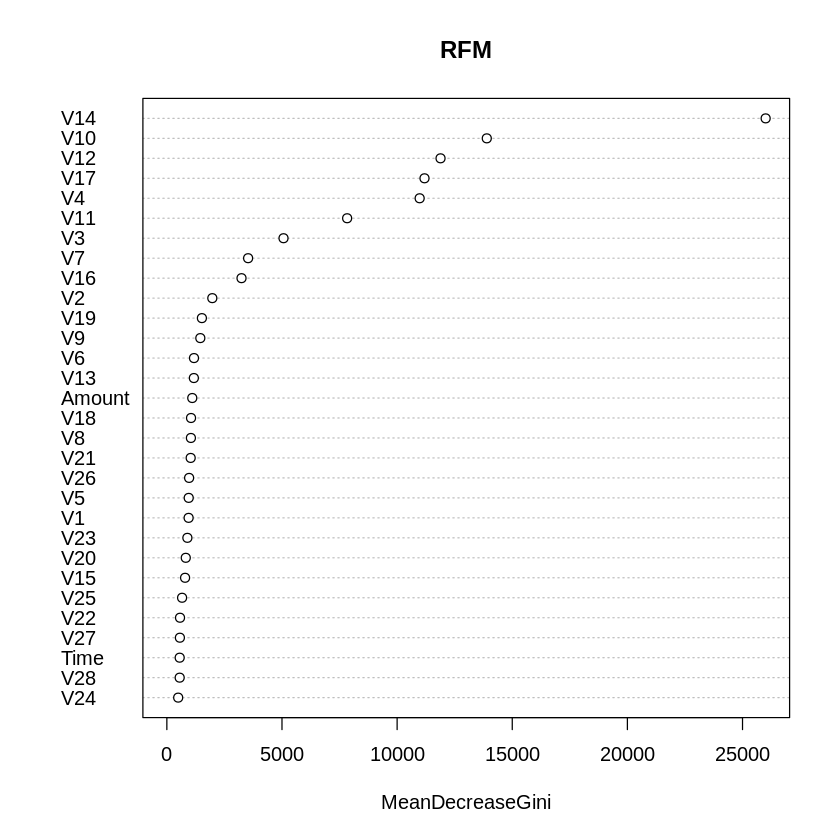

In [ ]:
varImpPlot(RFM)

In [ ]:
#Hyper parameter obtained is ntree 150 and mtry as 3

In [ ]:
### 5. Evaluating Model Accuracy

In [ ]:
Class_pred = predict(RFM,test_set)

In [ ]:
test_set$Class_pred = Class_pred

In [ ]:
#View(testdata)
# Evaluate predictions on the testdata dataset through Confusion Matrix

In [ ]:
### 6. Building Confusion Matrix

In [ ]:
CFM2 = table(test_set$Class,test_set$Class_pred)
CFM2

ERROR: ignored

In [ ]:
### 7. Calculating the Accuracy of the model using test data 
Classification_Accurancy = sum(diag(CFM2)/sum(CFM2))
Classification_Accurancy #99.94

[1] 0.9994558

In [ ]:
TN = CFM2[1,1] # True Negative - Actual & Predicted is 0/N
TP = CFM2[2,2] # True Positive - Actual & Predicted is 1/Y
FP = CFM2[2,1] # False Positive - Actual is 0/N but Predicted is 1/Y
FN = CFM2[1,2] # False Nefgative - Actual is 1/Y but Predicted is 0/N
TO = TN+TP+FP+FN # Total Observations

In [ ]:
accuracy = (TP+TN)/TO # Accuracy or Prevalence of Confusion Matrix
accuracy # 99.94%

[1] 0.9994558

In [ ]:
precision = TP/(TP+FP) # Precision
precision # 77.55%


[1] 0.7755102

In [ ]:
sensitivity = TP/(TP+FN) # True Positive Rate (as high as possible)
sensitivity # 89.41%

[1] 0.8941176

In [ ]:
specificity = TN/(TN+FP) # True Negative Rate
specificity # 99.96%

[1] 0.9996132

In [ ]:
Fallout = 1 - specificity # False Negative Rate (as low as possbile)
Fallout*100  #3.86%

[1] 0.03868064

In [ ]:
error = (FP+FN)/TO # Error Rate
error # 0.054%


[1] 0.000544232

In [ ]:
# Sensitivity - 89.41%
# Specificity - 99.96
# Positive predictive value - 0.9786
# Accuracy = 99.94%

In [ ]:
### Conclusion of overall Model Summary and model findings states us that sensitivity is 89.41% with AUC of 94.33% with Model being the better
#among other tested models

In [ ]:
#AUC is the area of space that lies under the ROC curve. Intuitively, the closer this is to 1, the better our classification model is. 
#The AUC of the dotted line is 0.5. The AUC of a perfect model would be 1.

#The Accuracy % of LR is 97.84% and Random Forest Model is 99.94% and hence we would be 
#relying on our random forest  model for this Credit Default dataset.This model 
#predicts the customer would default 99.96% more accurate than LR model of 89.41%. Also, theerror rate for random forest is 0.94% as compared to 2.15% of LR model.
#Overall, seeing both AUC and Accuracy we can see that Random forest model is best. Both models regardless have their pros and cons


In [ ]:
########################################################################################################################################################################

# Validation of our model using testdata dataset
#testdata_new=testdata[,c(1,6,7,8,9)]
#k-Fold Cross Validation

In [ ]:
View(over_sample_train_data)

In [ ]:
over_sample_train_data$Class = as.numeric(over_sample_train_data$Class)

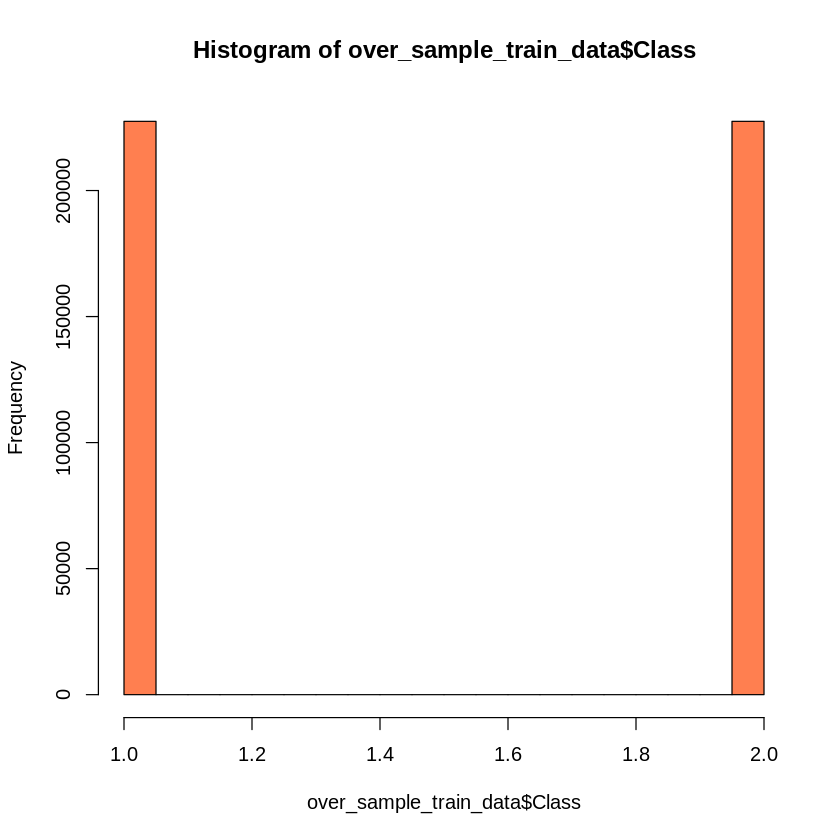

In [ ]:
hist(over_sample_train_data$Class,col="coral")

In [ ]:
prop.table(table(over_sample_train_data$Class))


  0   1 
0.5 0.5 

In [ ]:
set.seed(100)

In [ ]:
trctrl <- trainControl(method = "cv", number = 10, savePredictions=TRUE)

In [ ]:
nb_fit <- train(factor(Class) ~., data = under_sample_train_data, method = "knn", trControl=trctrl, tuneLength = 0)

In [ ]:
nb_fit

k-Nearest Neighbors 

788 samples
 30 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 710, 709, 710, 708, 709, 709, ... 
Resampling results:

  Accuracy   Kappa    
  0.9175247  0.8350472

Tuning parameter 'k' was held constant at a value of 5

In [ ]:
pred <- nb_fit$pred

ERROR: ignored

In [ ]:
pred$equal <- ifelse(pred$pred == pred$obs, 1,0)

In [ ]:
eachfold <- pred

In [ ]:
eachfold

pred,obs,rowIndex,k,Resample,equal
<fct>,<fct>,<int>,<int>,<chr>,<dbl>
0,0,7,5,Fold01,1
1,0,9,5,Fold01,0
0,0,20,5,Fold01,1
0,0,25,5,Fold01,1
0,0,32,5,Fold01,1
0,0,34,5,Fold01,1
0,0,40,5,Fold01,1
0,0,41,5,Fold01,1
0,0,45,5,Fold01,1


In [ ]:
###################################################
#from K fold validation we see that the accuracy of model is above 90% which is a good model sign.